<h1 style="text-align:center;font-size:30px;" > M5 Forecasting - Accuracy </h1>

<h1> 1. Business Problem </h1>

<p> Forecasting has been playing a major role in planning for companies growth.
That can be in terms of Investing in any tangible or non-tangible assets, Budget
Allocations, Risk management etc.</p>
<p>Sales being major part of revenue in many companies, especially companies like
Walmart, where forecasting of such parameter becomes an essential part for the
companies’ growth.</p>
<p> One such Problem statement given by Walmart, Where hierarchal sales dataset
is provided and based on which one should forecast the sales for next 28 days. The data is
recorded from stores situated in three US states i.e. California, Texas and
Wisconsin. Data is in hierarchal form, starting from top as State then moving
forward to Stores, Categories, Department and in last Items.</p>

Kaggle -> https://www.kaggle.com/c/m5-forecasting-accuracy

<h2> Hierarchal Data structure </h2>

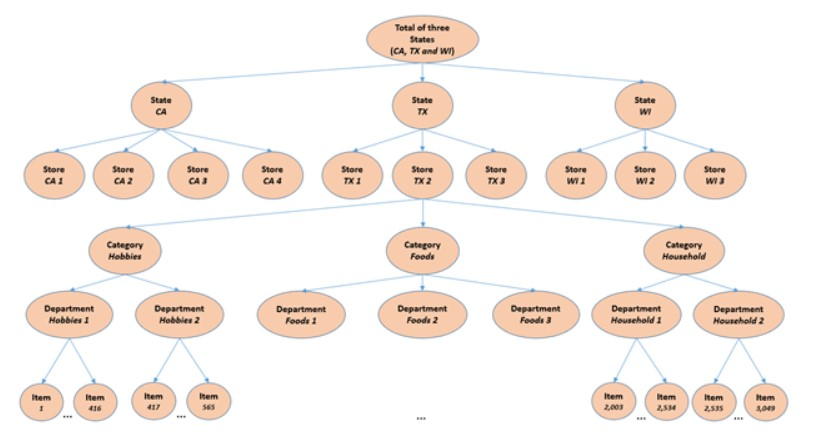

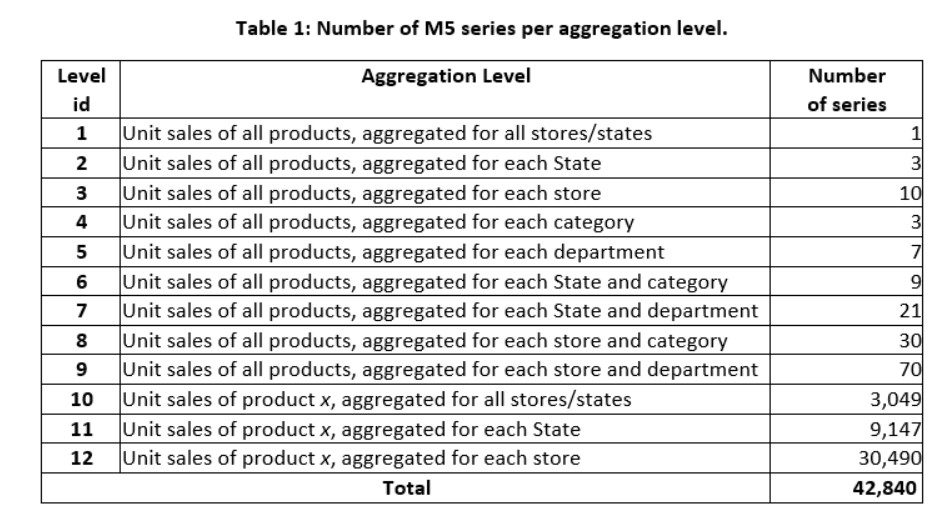

<h1>2. Data Overview</h1>

<p> <b>Calendar.csv </b><br>
•	date: The date in a “y-m-d” format.<br>
•	wm_yr_wk: The id of the week the date belongs to.<br>
•	weekday: The type of the day (Saturday, Sunday, …, Friday).<br>
•	wday: The id of the weekday, starting from Saturday.<br>
•	month: The month of the date.<br>
•	year: The year of the date.<br>
•	event_name_1: If the date includes an event, the name of this event.<br>
•	event_type_1: If the date includes an event, the type of this event.<br>
•	event_name_2: If the date includes a second event, the name of this event.<br>
•	event_type_2: If the date includes a second event, the type of this event.<br>
•	snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP               purchases on the examined date. 1 indicates that SNAP purchases are allowed.<br>
</p>

<p><b>sell_prices.csv</b><br>
Contains information about the price of the products sold per store and date.<br>
•	store_id: The id of the store where the product is sold. <br>
•	item_id: The id of the product.<br>
•	wm_yr_wk: The id of the week.<br>
•	sell_price: The price of the product for the given week/store. The price is provided per week (average across seven days). If not available, this means that the product was not sold during the examined week. Note that although prices are constant at weekly basis, they may change through time (both training and test set).<br>
</p>

<p><b>sales_train.csv</b><br>
Contains the historical daily unit sales data per product and store.<br>
•	item_id: The id of the product.<br>
•	dept_id: The id of the department the product belongs to.<br>
•	cat_id: The id of the category the product belongs to.<br>
•	store_id: The id of the store where the product is sold.<br>
•	state_id: The State where the store is located.<br>
•	d_1, d_2, …, d_i, … d_1941: The number of units sold at day i, starting from 2011-01-29.<br>
</p>

from Competitors’ Guides -> https://mofc.unic.ac.cy/m5-competition/ 

# 3. Constraints

• Underestimating will fail customers satisfaction <br>
• Overestimation will lead burden to warehouse and increase unecessary cost <br>
• There is no strict latency required in prediction <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import july
from july.utils import date_range
import numpy as np

In [2]:
#!pip install sktime
#!pip install july

<h1> EDA </h1>

In [3]:
cal = pd.read_csv('calendar.csv')
cal.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [4]:
cal['event_name_1'].unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

Text(0.5, 0, 'event_name_1')

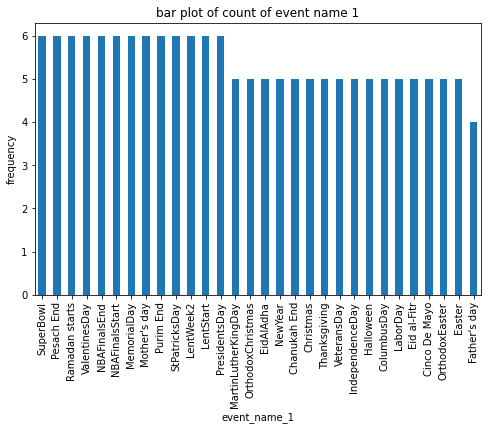

In [5]:
cal['event_name_1'].value_counts().plot.bar(figsize=(8, 5),title='bar plot of count of event name 1')
plt.ylabel("frequency")
plt.xlabel("event_name_1")

In [6]:
cal['event_name_2'].unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

Text(0.5, 0, 'event_name_2')

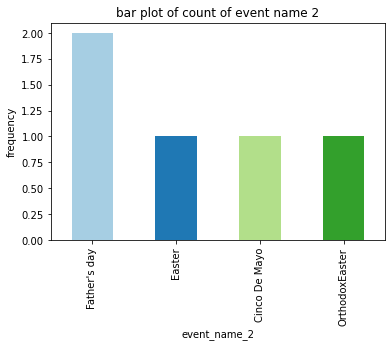

In [7]:
cal['event_name_2'].value_counts().plot.bar(color = 
plt.cm.Paired(np.arange(len(cal['event_name_2'].value_counts()))),title='bar plot of count of event name 2')
plt.ylabel("frequency")
plt.xlabel("event_name_2")

Text(0.5, 0, 'event_type_1')

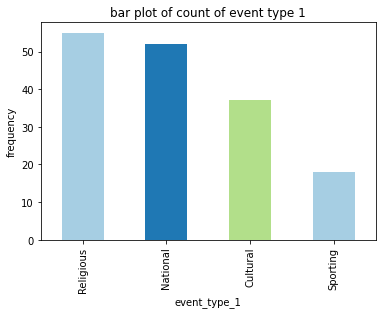

In [8]:
cal['event_type_1'].value_counts().plot.bar(color = 
plt.cm.Paired(np.arange(len(cal['event_type_1'].value_counts()[1:]))),title='bar plot of count of event type 1')
plt.ylabel("frequency")
plt.xlabel("event_type_1")

Text(0.5, 0, 'event_type_2')

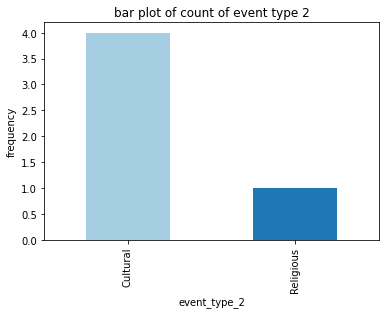

In [9]:
cal['event_type_2'].value_counts().plot.bar(color = 
plt.cm.Paired(np.arange(len(cal['event_type_2'].value_counts()))),title='bar plot of count of event type 2')
plt.ylabel("frequency")
plt.xlabel("event_type_2")

<p>Number of event type 1 is lot higher than the number of event type 2.<br>
National events dominate in event type 1 and cultural events dominate in event type 2</p>

In [10]:
cal.fillna(0,inplace=True) #filling NaN values with 0, indicating no events
cal.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1            0   
1  2011-01-30     11101     Sunday     2      1  2011  d_2            0   
2  2011-01-31     11101     Monday     3      1  2011  d_3            0   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4            0   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5            0   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0            0            0            0        0        0        0  
1            0            0            0        0        0        0  
2            0            0            0        0        0        0  
3            0            0            0        1        1        0  
4            0            0            0        1        0        1

In [11]:
st = pd.read_csv('sales_train_evaluation.csv')
st.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

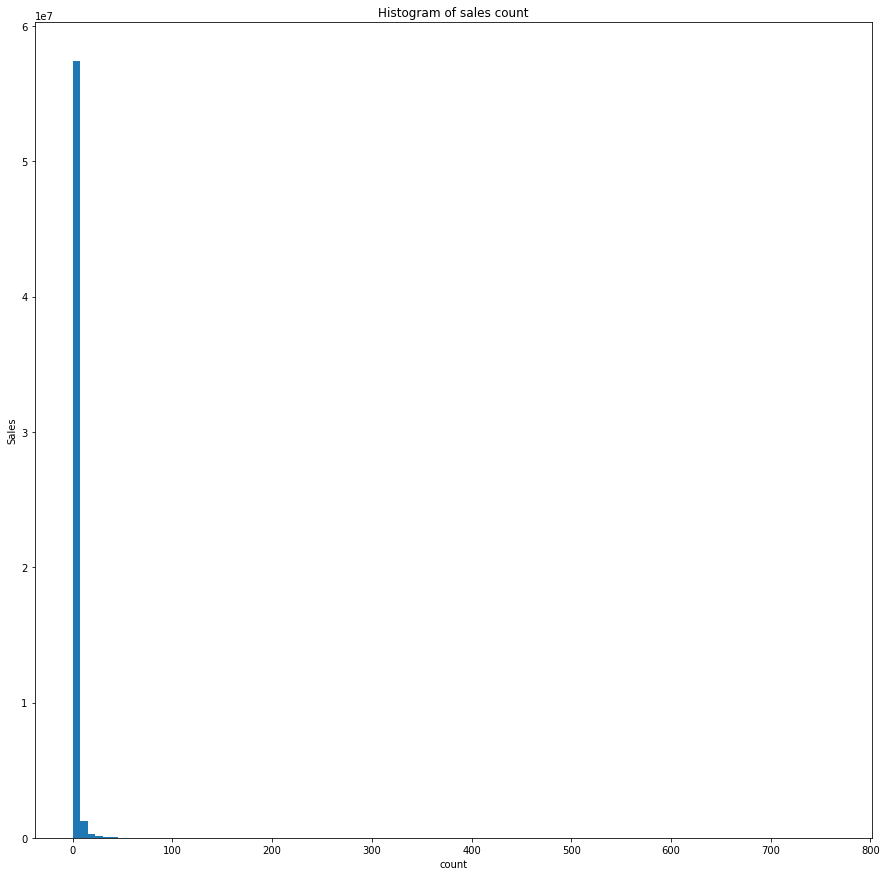

In [12]:
plt.figure(figsize=(15, 15))
plt.hist(np.ravel(st.iloc[:,6:].to_numpy()), bins=100)
plt.title("Histogram of sales count")
plt.xlabel("count")
plt.ylabel("Sales")
plt.show()

The Tweedie distribution is a special case of an exponential distribution. It can have a cluster of data items at zero (called a “point mass”). This type of distribution has clusters at zero and at non negative points. By definition of tweedie distribution we can conclude that above distribution is tweedie distribution

In [13]:
st.isna().sum().sum()

0

In [14]:
total_sale_inday = st.sum(axis = 0, skipna = True) #summing up all sales

In [15]:
total_sale_inday = total_sale_inday.to_frame().reset_index() #sum of all sales in a day

In [16]:
total_sale_inday.rename(columns={'index': 'd',0:'sale'},inplace = True) #renaiming columns
total_sale_inday.columns

Index(['d', 'sale'], dtype='object')

In [17]:
total_sale_inday['d']

0             id
1        item_id
2        dept_id
3         cat_id
4       store_id
          ...   
1942      d_1937
1943      d_1938
1944      d_1939
1945      d_1940
1946      d_1941
Name: d, Length: 1947, dtype: object

In [18]:
total_sale_date = pd.merge(total_sale_inday[6:],cal,on = 'd',how = 'left') #merging with calendar.csv datframe to get the dates
total_sale_date.head()

d   sale        date  wm_yr_wk    weekday  wday  month  year  \
0  d_1  32631  2011-01-29     11101   Saturday     1      1  2011   
1  d_2  31749  2011-01-30     11101     Sunday     2      1  2011   
2  d_3  23783  2011-01-31     11101     Monday     3      1  2011   
3  d_4  25412  2011-02-01     11101    Tuesday     4      2  2011   
4  d_5  19146  2011-02-02     11101  Wednesday     5      2  2011   

  event_name_1 event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  \
0            0            0            0            0        0        0   
1            0            0            0            0        0        0   
2            0            0            0            0        0        0   
3            0            0            0            0        1        1   
4            0            0            0            0        1        0   

   snap_WI  
0        0  
1        0  
2        0  
3        0  
4        1

In [19]:
total_sale_date[total_sale_date['d']=='d_1941']

d   sale        date  wm_yr_wk weekday  wday  month  year  \
1940  d_1941  54338  2016-05-22     11617  Sunday     2      5  2016   

     event_name_1 event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  \
1940            0            0            0            0        0        0   

      snap_WI  
1940        0

In [20]:
df = total_sale_date['sale']  #creating just different dataframe where it contains sum of sales and date as index
df.index = pd.to_datetime(total_sale_date['date'])

Text(0, 0.5, 'Sales')

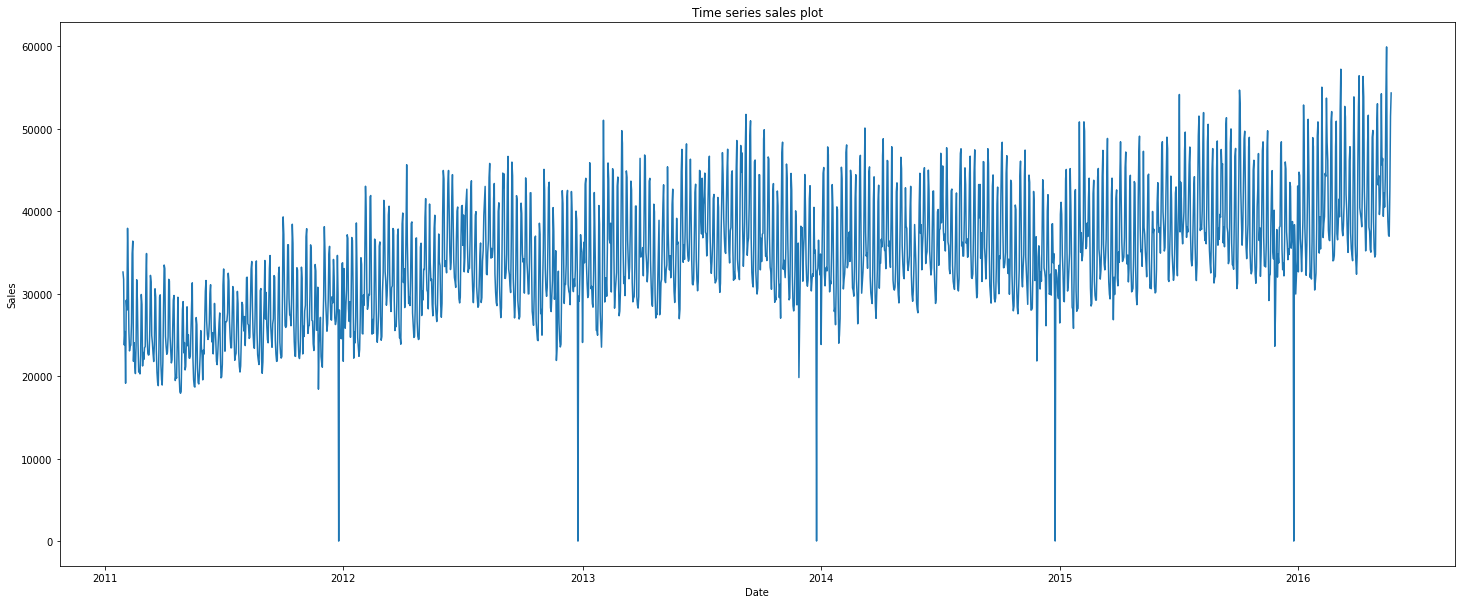

In [21]:
plt.figure(figsize=(25, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
plt.plot(df)
plt.title("Time series sales plot")
plt.xlabel("Date")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

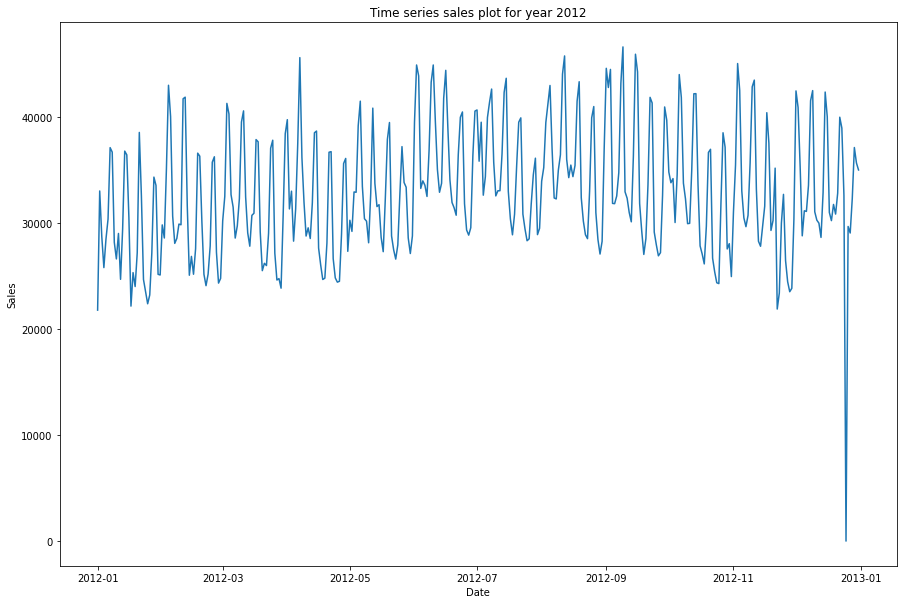

In [22]:
fig = plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
plt.plot(df[337:703])
plt.title("Time series sales plot for year 2012")
plt.xlabel("Date")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

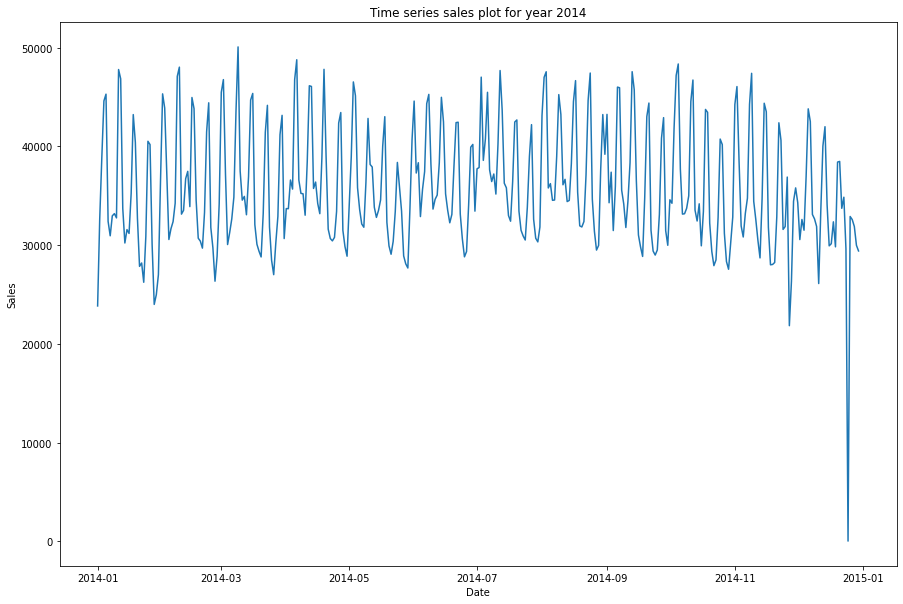

In [23]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
plt.plot(df[1068:1432])
plt.title("Time series sales plot for year 2014")
plt.xlabel("Date")
plt.ylabel("Sales")

<p> From observing the Time series sales plot of year 2012 and 2014, there is some similarity in data distribution <br> 
Every year, sales has been decreased during christmas. This may be Due to family gatherings which people usually preffer rather than shopping during that day i.e. 25th of December
</p>

### Autocorrelation and Partial Autocorrelation plot

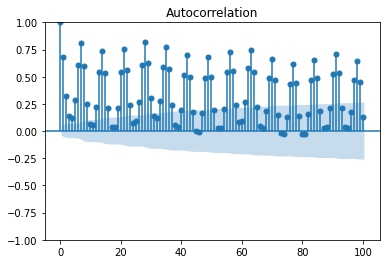

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df,lags=100)
plt.show()

D:\softwares\miniconda\envs\env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


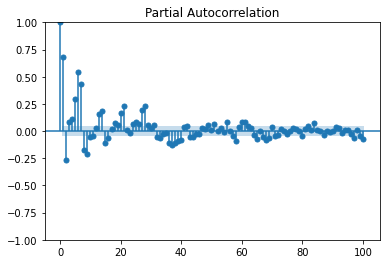

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df,lags=100)
plt.show()

<p> From both ac plot and pac plot, lags -: [1,7,14,28,35,42,49,56,63,70,77] is highly correlated with current sales <br> 
with keeping above things in mind, we will add features related to this</p>

## Yearly Sales Analysis

### Year 2011

Text(0, 0.5, 'Sales')

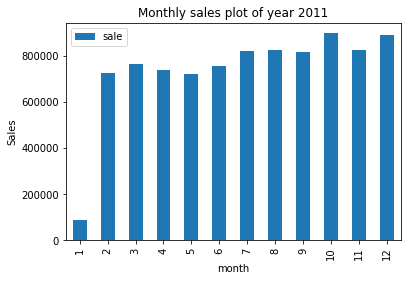

In [26]:
month = pd.DataFrame(df[:337])
month['month'] = df.index.month[:337]
mon = month.groupby(['month']).sum()
mon.plot.bar(title='Monthly sales plot of year 2011').set_ylabel("Sales")

Text(0, 0.5, 'Sales')

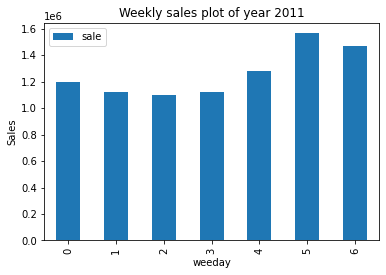

In [27]:
month = pd.DataFrame(df[:337])
month['weeday'] = df.index.weekday[:337]
mon = month.groupby(['weeday']).sum()
mon.plot.bar(title='Weekly sales plot of year 2011').set_ylabel("Sales")

<Figure size 1080x720 with 0 Axes>

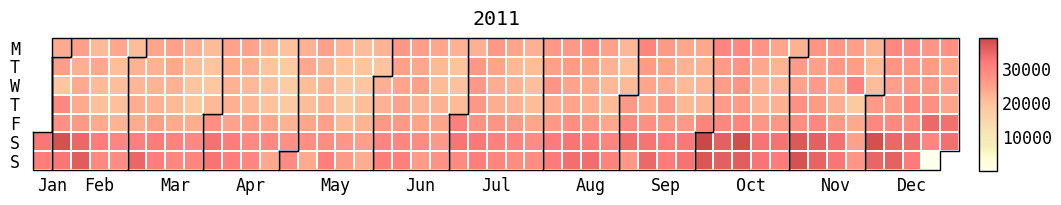

In [28]:
plt.figure(figsize=(15, 10))
dates = df.index[:337] #https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
july.heatmap(dates, df[:337],horizontal=True,month_grid=True,colorbar=True)
plt.show()

### Year 2012

Text(0, 0.5, 'Sales')

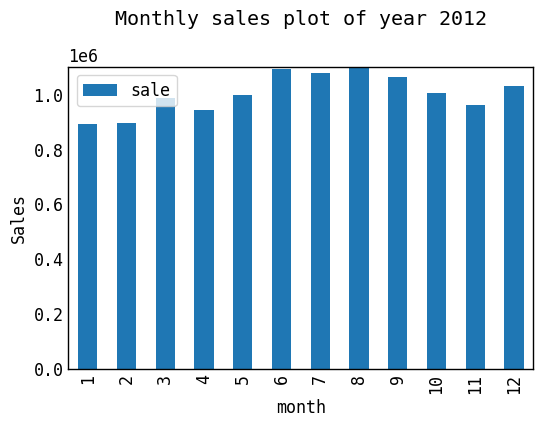

In [29]:
month = pd.DataFrame(df[337:703])
month['month'] = df.index.month[337:703]
mon = month.groupby(['month']).sum()
mon.plot.bar(title='Monthly sales plot of year 2012').set_ylabel("Sales")

Text(0, 0.5, 'Sales')

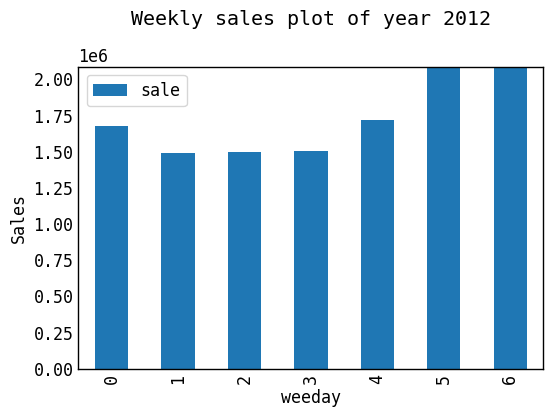

In [30]:
month = pd.DataFrame(df[337:703])
month['weeday'] = df.index.weekday[337:703]
mon = month.groupby(['weeday']).sum()
mon.plot.bar(title='Weekly sales plot of year 2012').set_ylabel("Sales")

<Figure size 1500x1000 with 0 Axes>

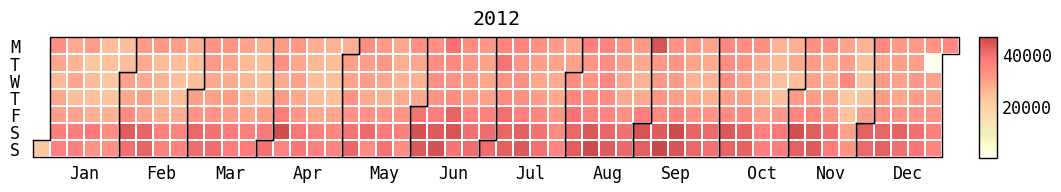

In [31]:
plt.figure(figsize=(15, 10))
dates = df.index[337:703] #https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
july.heatmap(dates, df[337:703],horizontal=True,month_grid=True,colorbar=True)
plt.show()

### Year 2013

Text(0, 0.5, 'Sales')

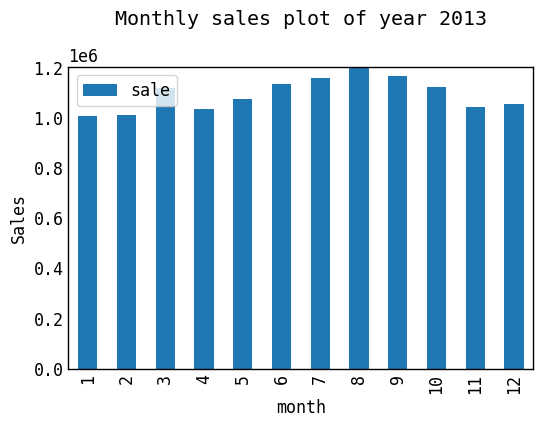

In [32]:
month = pd.DataFrame(df[703:1068])
month['month'] = df.index.month[703:1068]
mon = month.groupby(['month']).sum()
mon.plot.bar(title='Monthly sales plot of year 2013').set_ylabel("Sales")

Text(0, 0.5, 'Sales')

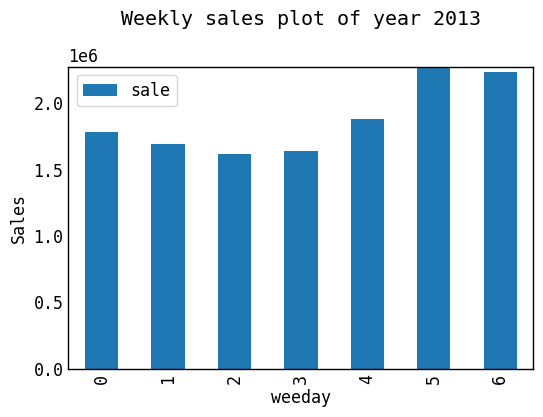

In [33]:
month = pd.DataFrame(df[703:1068])
month['weeday'] = df.index.weekday[703:1068]
mon = month.groupby(['weeday']).sum()
mon.plot.bar(title='Weekly sales plot of year 2013').set_ylabel("Sales")

<Figure size 1500x1000 with 0 Axes>

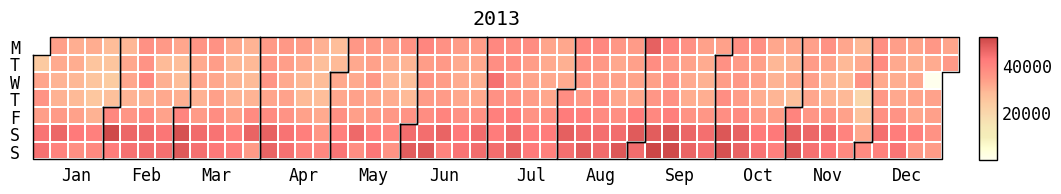

In [34]:
plt.figure(figsize=(15, 10))
dates = df.index[703:1068] #https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
july.heatmap(dates, df[703:1068],horizontal=True,month_grid=True,colorbar=True)
plt.show()

### Year 2014

Text(0, 0.5, 'Sales')

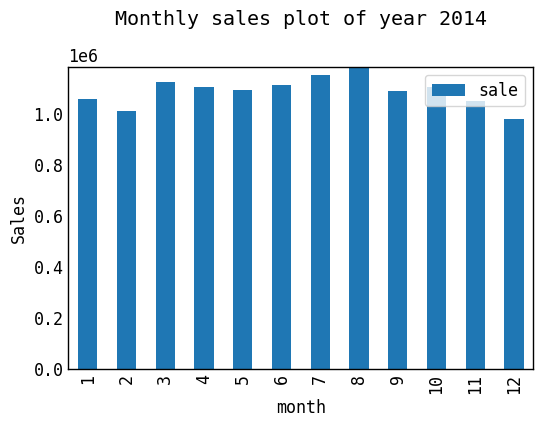

In [35]:
month = pd.DataFrame(df[1068:1432])
month['month'] = df.index.month[1068:1432]
mon = month.groupby(['month']).sum()
mon.plot.bar(title='Monthly sales plot of year 2014').set_ylabel("Sales")

Text(0, 0.5, 'Sales')

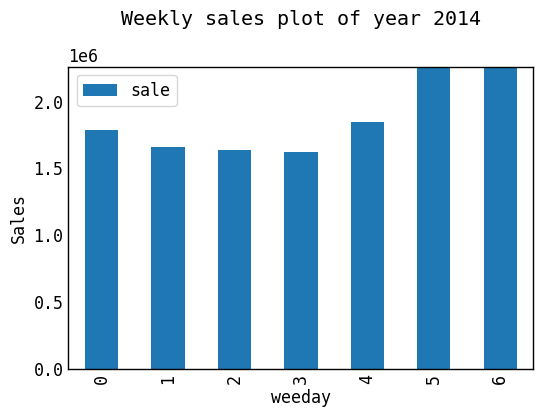

In [36]:
month = pd.DataFrame(df[1068:1432])
month['weeday'] = df.index.weekday[1068:1432]
mon = month.groupby(['weeday']).sum()
mon.plot.bar(title='Weekly sales plot of year 2014').set_ylabel("Sales")

D:\softwares\miniconda\envs\env\lib\site-packages\july\helpers.py:31: RuntimeWarning: invalid value encountered in multiply
  grid = np.nan * grid if dtype == "float64" else grid


<Figure size 1500x1000 with 0 Axes>

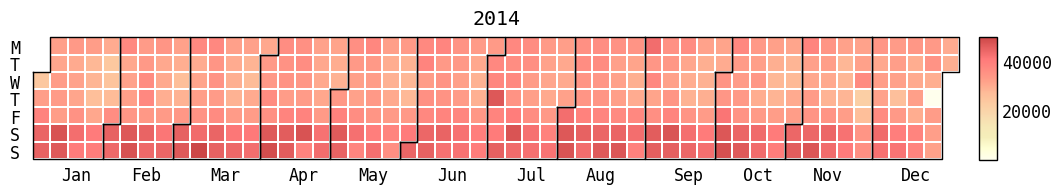

In [37]:
plt.figure(figsize=(15, 10))
dates = df.index[1068:1432] #https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
july.heatmap(dates, df[1068:1432],horizontal=True,month_grid=True,colorbar=True)
plt.show()

### Year 2015

Text(0, 0.5, 'Sales')

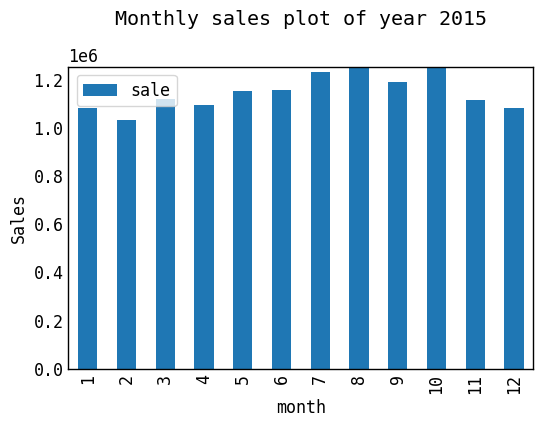

In [38]:
month = pd.DataFrame(df[1433:1797])
month['month'] = df.index.month[1433:1797]
mon = month.groupby(['month']).sum()
mon.plot.bar(title='Monthly sales plot of year 2015').set_ylabel("Sales")

Text(0, 0.5, 'Sales')

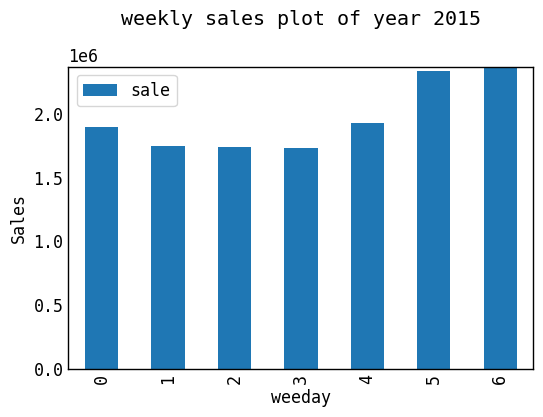

In [39]:
month = pd.DataFrame(df[1433:1797])
month['weeday'] = df.index.weekday[1433:1797]
mon = month.groupby(['weeday']).sum()
mon.plot.bar(title='weekly sales plot of year 2015').set_ylabel("Sales")

<Figure size 1500x1000 with 0 Axes>

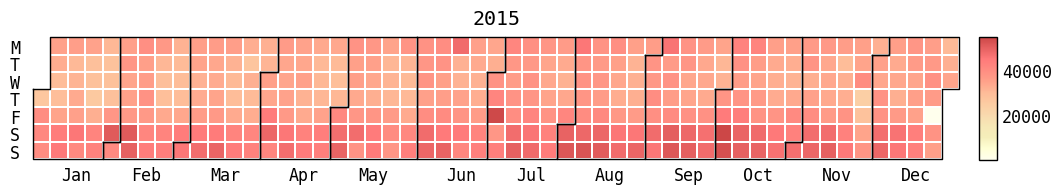

In [ ]:
plt.figure(figsize=(15, 10))
dates = df.index[1433:1797] #https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
july.heatmap(dates, df[1433:1797],horizontal=True,month_grid=True,colorbar=True)
plt.show()

<p>From above plots<br> 
-Sunday and Saturday have higher number of sales when comparing with weekdays <br>
-Quarter 2 and Quarter 3 have higher number of sales compared to other quarter.<br>
While proceeding with feature engineering, above two points will be considered</p>

# Analysing each Hierarchy

In [40]:
rename = dict(zip(total_sale_date['d'],(pd.to_datetime(total_sale_date['date'])).dt.date))

In [41]:
st.rename(columns = rename,inplace=True)
st  #renamed d_1 - d_1941 to date

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  2011-01-29  2011-01-30  2011-01-31  2011-02-01  ...  \
0         CA_1       CA           0           0           0           0  ...   
1         CA_1       CA           0           0           0           0  ...   
2         CA_1       CA           0           0           0           0  ...   
3         CA_1       CA           0           0           0           0  ...   
4         CA_1       CA           0           0           0           0  ...   
...        ...      ...         ...         ...         ...         ...  ...   
30485     WI_3       WI           0           0           2           2  ...   
30486     WI_3       WI           0           0           0           0  ...   
30487     WI_3       WI           0           6           0           2  ...   
30488     WI_3       WI           0           0           0           0  ...   
30489     WI_3       WI           0           0           0           0  ...   

       2016-05-13  2016-05-14  2016-05-15  2016-05-16  2016-05-17  2016-05-18  \
0               2           4           0           0           0           0   
1               0           1           2           1           1           0   
2               1           0           2           0           0           0   
3               1           1           0           4           0           1   
4               0           0           0           2           1           0   
...           ...         ...         ...         ...         ...         ...   
30485           1           0           3           0           1           1   
30486           0           0           0           0           0           0   
30487           0           0           1           2           0           1   
30488           1           1           1           4           6           0   
30489           1           2           0           5           4           0   

       2016-05-19  2016-05-20  2016-05-21  2016-05-22  
0               3           3           0           1  
1               0           0           0           0  
2               2           3           0           1  
3               3           0           2           6  
4               0           2           1           0  
...           ...         ...         ...         ...  
30485           0           0           1           1  
30486           1           0           1           0  
30487           0           1           0           2  
30488           1           1           1           0  
30489           2           2           5           1  

[30490 rows x 1947 columns]

## STATE 

Text(0.5, 1.0, 'Distribution of states')

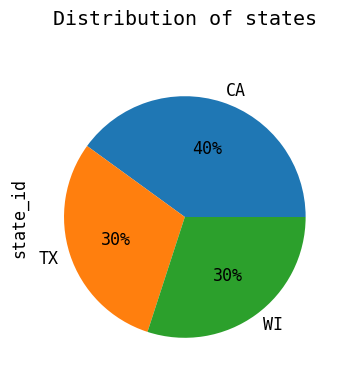

In [47]:
st['state_id'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Distribution of states")

In [42]:
state = st.groupby(['state_id']).sum()
state

2011-01-29  2011-01-30  2011-01-31  2011-02-01  2011-02-02  \
state_id                                                               
CA             14195       13805       10108       11047        9925   
TX              9438        9630        6778        7381        5912   
WI              8998        8314        6897        6984        3309   

          2011-02-03  2011-02-04  2011-02-05  2011-02-06  2011-02-07  ...  \
state_id                                                              ...   
CA             11322       12251       16610       14696       11822  ...   
TX              9006        6226        9440        9376        7319  ...   
WI              8883        9533       11882        8664        6431  ...   

          2016-05-13  2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
state_id                                                               
CA             18471       23037       24704       17721       16150   
TX             12320       12366       16249       12228       11370   
WI             13282       18905       18968       12413       11257   

          2016-05-18  2016-05-19  2016-05-20  2016-05-21  2016-05-22  
state_id                                                              
CA             15678       16297       17430       23103       24644  
TX             10375        9162       12303       13681       14815  
WI             11043       11504       12819       14734       14879  

[3 rows x 1941 columns]

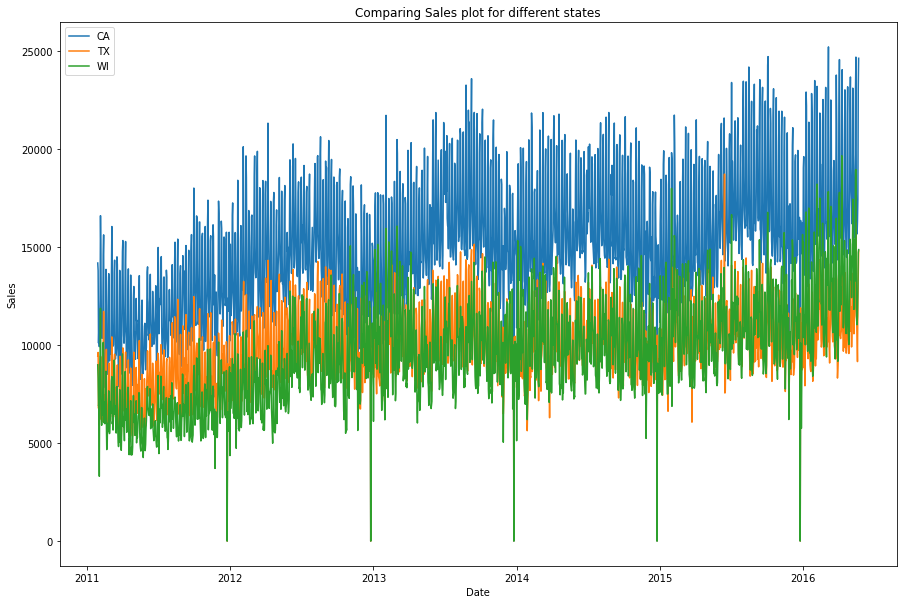

In [37]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
plt.plot(pd.to_datetime(state.columns),state.loc['CA'],label = 'CA')
plt.plot(pd.to_datetime(state.columns),state.loc['TX'],label = 'TX')
plt.plot(pd.to_datetime(state.columns),state.loc['WI'],label = 'WI')
plt.title("Comparing Sales plot for different states")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

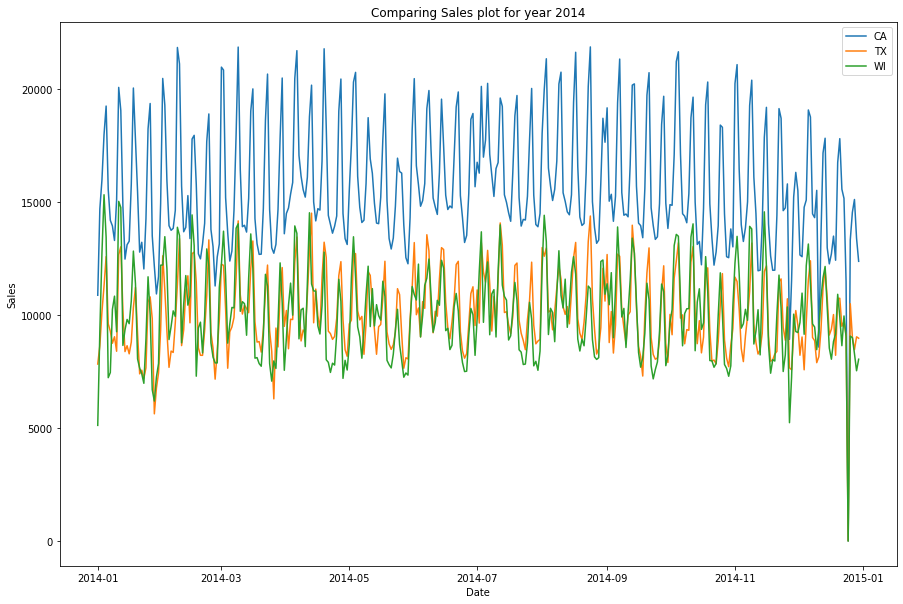

In [38]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
plt.plot(state.columns[1068:1432],state.loc['CA'][1068:1432],label = 'CA')
plt.plot(state.columns[1068:1432],state.loc['TX'][1068:1432],label = 'TX')
plt.plot(state.columns[1068:1432],state.loc['WI'][1068:1432],label = 'WI')
plt.title("Comparing Sales plot for year 2014")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

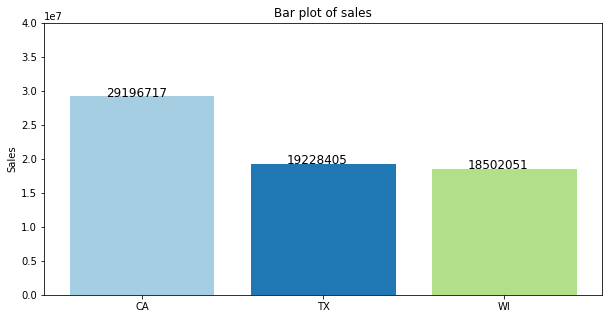

In [39]:
plt.figure(figsize=(10, 5))
plt.ylim(0,40000000)
plt.bar(state.index,state.sum(axis=1),color = plt.cm.Paired(np.arange(len(state.index))))
for index,data in enumerate(state.sum(axis=1)):  #https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    plt.text(x=index-0.2 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.title("Bar plot of sales")
plt.ylabel("Sales")
plt.show()

<p> California have highest. This is primarily due to higher average income <br>
Data distribution of TX and WI is almost similar</p>

## STORE

In [ ]:
store = st.groupby(['store_id']).sum()
store

2011-01-29  2011-01-30  2011-01-31  2011-02-01  2011-02-02  \
store_id                                                               
CA_1            4337        4155        2816        3051        2630   
CA_2            3494        3046        2121        2324        1942   
CA_3            4739        4827        3785        4232        3817   
CA_4            1625        1777        1386        1440        1536   
TX_1            2556        2687        1822        2258        1694   
TX_2            3852        3937        2731        2954        2492   
TX_3            3030        3006        2225        2169        1726   
WI_1            2704        2194        1562        1251           2   
WI_2            2256        1922        2018        2522        1175   
WI_3            4038        4198        3317        3211        2132   

          2011-02-03  2011-02-04  2011-02-05  2011-02-06  2011-02-07  ...  \
store_id                                                              ...   
CA_1            3276        3450        5437        4340        3157  ...   
CA_2            2288        2629        3729        2957        2218  ...   
CA_3            4369        4703        5456        5581        4912  ...   
CA_4            1389        1469        1988        1818        1535  ...   
TX_1            2734        1691        2820        2887        2174  ...   
TX_2            3439        2588        3772        3657        2932  ...   
TX_3            2833        1947        2848        2832        2213  ...   
WI_1            2049        2815        3248        1674        1355  ...   
WI_2            2244        2232        2643        2140        1836  ...   
WI_3            4590        4486        5991        4850        3240  ...   

          2016-05-13  2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
store_id                                                               
CA_1            4951        6245        6707        4568        3949   
CA_2            4839        6507        6710        4238        3963   
CA_3            6046        7029        7969        5891        5523   
CA_4            2635        3256        3318        3024        2715   
TX_1            3610        3787        5000        3708        3310   
TX_2            4415        4424        5866        4179        4008   
TX_3            4295        4155        5383        4341        4052   
WI_1            3978        5527        5488        3505        3323   
WI_2            5317        7704        7586        5011        4628   
WI_3            3987        5674        5894        3897        3306   

          2016-05-18  2016-05-19  2016-05-20  2016-05-21  2016-05-22  
store_id                                                              
CA_1            3995        4136        4433        5764        6289  
CA_2            3789        4037        4751        7120        6614  
CA_3            5375        5580        5542        7073        8144  
CA_4            2519        2544        2704        3146        3597  
TX_1            3147        2748        3664        4167        4624  
TX_2            3518        3126        4249        4802        5217  
TX_3            3710        3288        4390        4712        4974  
WI_1            3242        3478        3813        5002        5054  
WI_2            4533        4628        4880        5213        5068  
WI_3            3268        3398        4126        4519        4757  

[10 rows x 1941 columns]

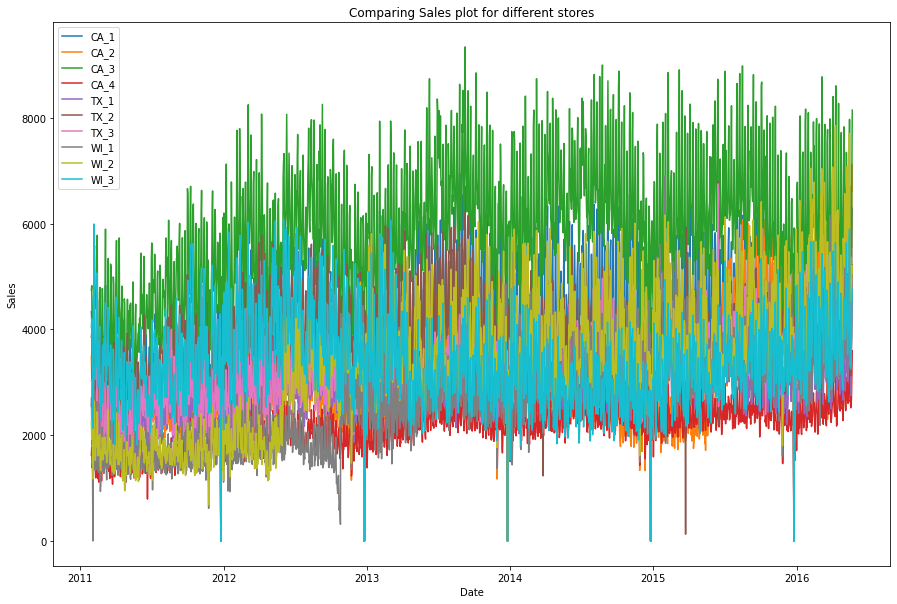

In [ ]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
for US_state in store.index:   #going through all states
    plt.plot(pd.to_datetime(store.columns),store.loc[US_state],label = US_state)
plt.title("Comparing Sales plot for different stores")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

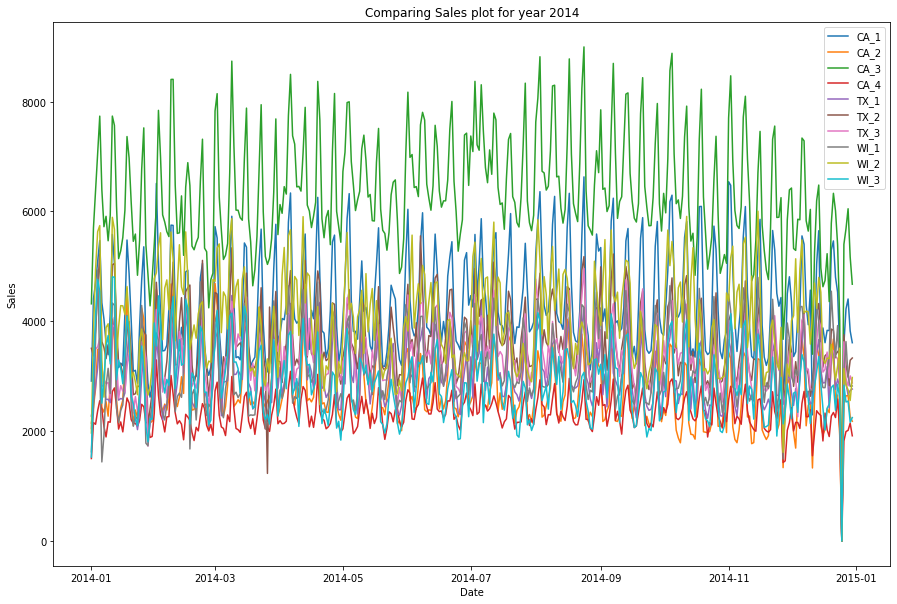

In [ ]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
for US_state in store.index:   #going through all states
    plt.plot(pd.to_datetime(store.columns)[1068:1432],store.loc[US_state][1068:1432],label = US_state)
plt.title("Comparing Sales plot for year 2014")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

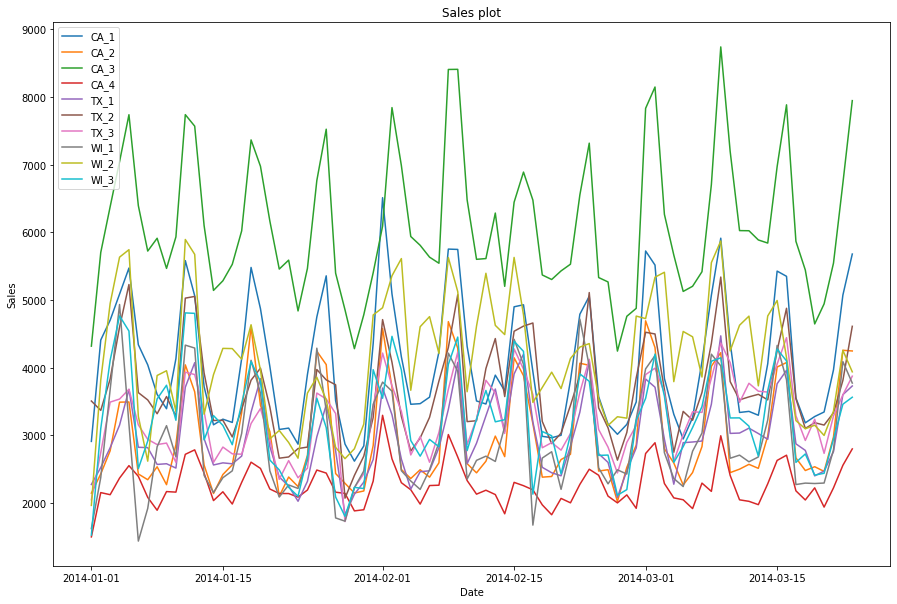

In [ ]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
for US_state in store.index:   #going through all states
    plt.plot(pd.to_datetime(store.columns)[1068:1150],store.loc[US_state][1068:1150],label = US_state)
plt.title("Sales plot")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Sales')

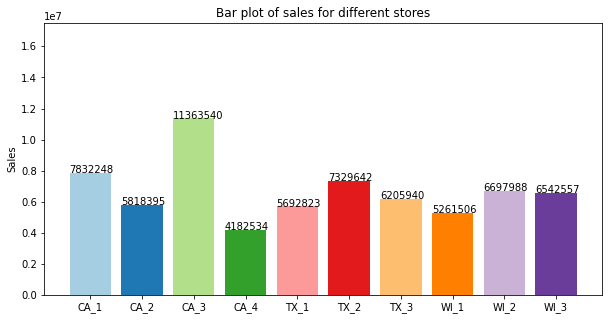

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylim(0,17500000)
plt.bar(store.index,store.sum(axis=1),color = plt.cm.Paired(np.arange(len(store.index))))
for index,data in enumerate(store.sum(axis=1)):  #https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    plt.text(x=index-0.40 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.title("Bar plot of sales for different stores")
plt.ylabel("Sales")

<p> 4th store of CA has least number of sales and most of sales in CA is due to 3rd store <br>
Here as well CA data distribution stands out and TX and WI have similar distribution</p>

## CATEGORIES

Text(0.5, 1.0, 'Distribution of categories')

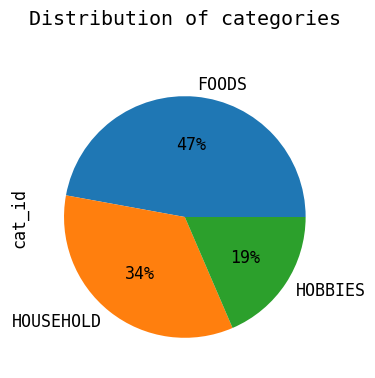

In [50]:
st['cat_id'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Distribution of categories")

In [ ]:
cat = st.groupby(['cat_id']).sum()
cat

2011-01-29  2011-01-30  2011-01-31  2011-02-01  2011-02-02  \
cat_id                                                                  
FOODS           23178       22758       17174       18878       14603   
HOBBIES          3764        3357        2682        2669        1814   
HOUSEHOLD        5689        5634        3927        3865        2729   

           2011-02-03  2011-02-04  2011-02-05  2011-02-06  2011-02-07  ...  \
cat_id                                                                 ...   
FOODS           22093       20490       27751       24862       18901  ...   
HOBBIES          3220        2944        3986        2899        2615  ...   
HOUSEHOLD        3898        4576        6195        4975        4056  ...   

           2016-05-13  2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
cat_id                                                                  
FOODS           30107       36576       41447       29158       26148   
HOBBIES          3871        4893        5016        3528        3629   
HOUSEHOLD       10095       12839       13458        9676        9000   

           2016-05-18  2016-05-19  2016-05-20  2016-05-21  2016-05-22  
cat_id                                                                 
FOODS           24790       24737       28136       33599       35967  
HOBBIES          3740        3475        4143        5333        5280  
HOUSEHOLD        8566        8751       10273       12586       13091  

[3 rows x 1941 columns]

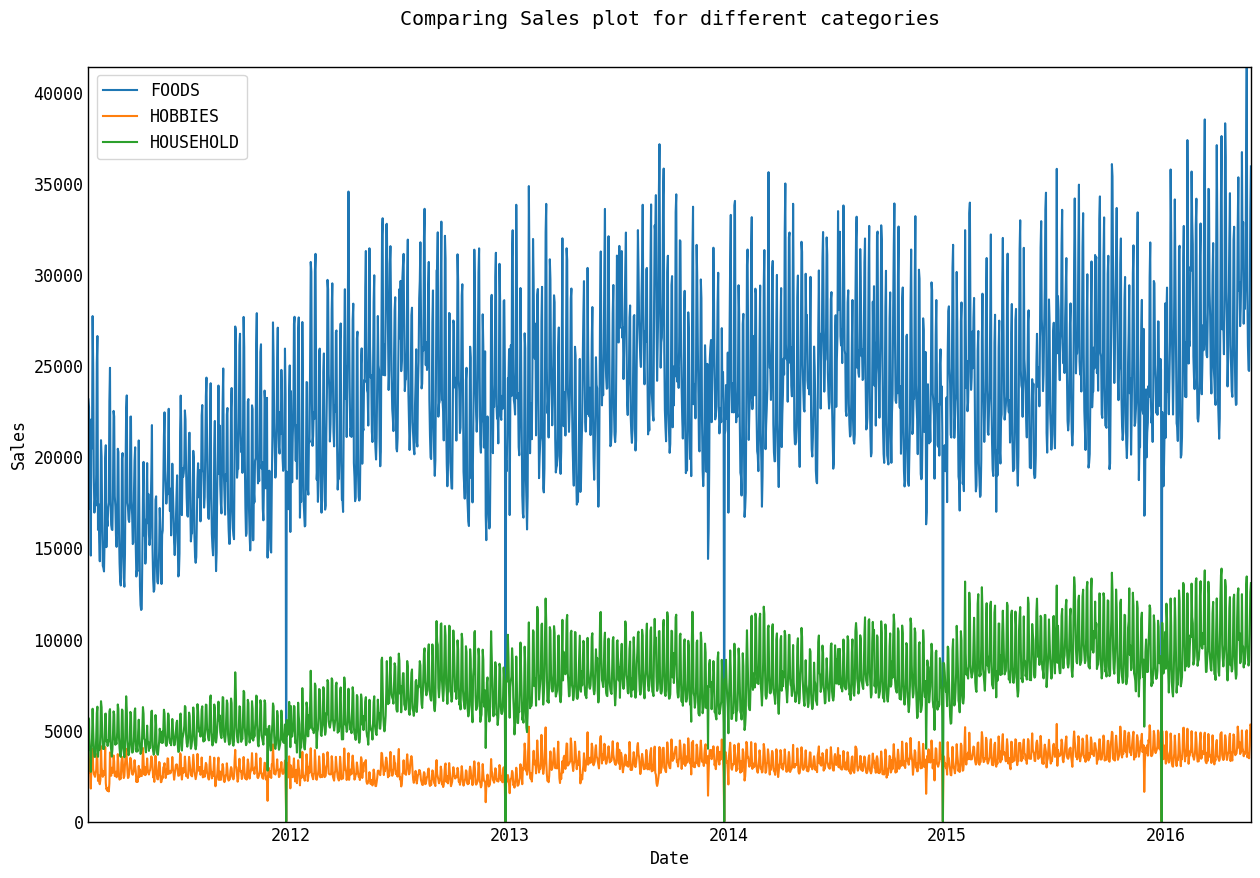

In [ ]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
for US_state in cat.index:   #going through all states
    plt.plot(pd.to_datetime(cat.columns),cat.loc[US_state],label = US_state)
plt.title("Comparing Sales plot for different categories")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

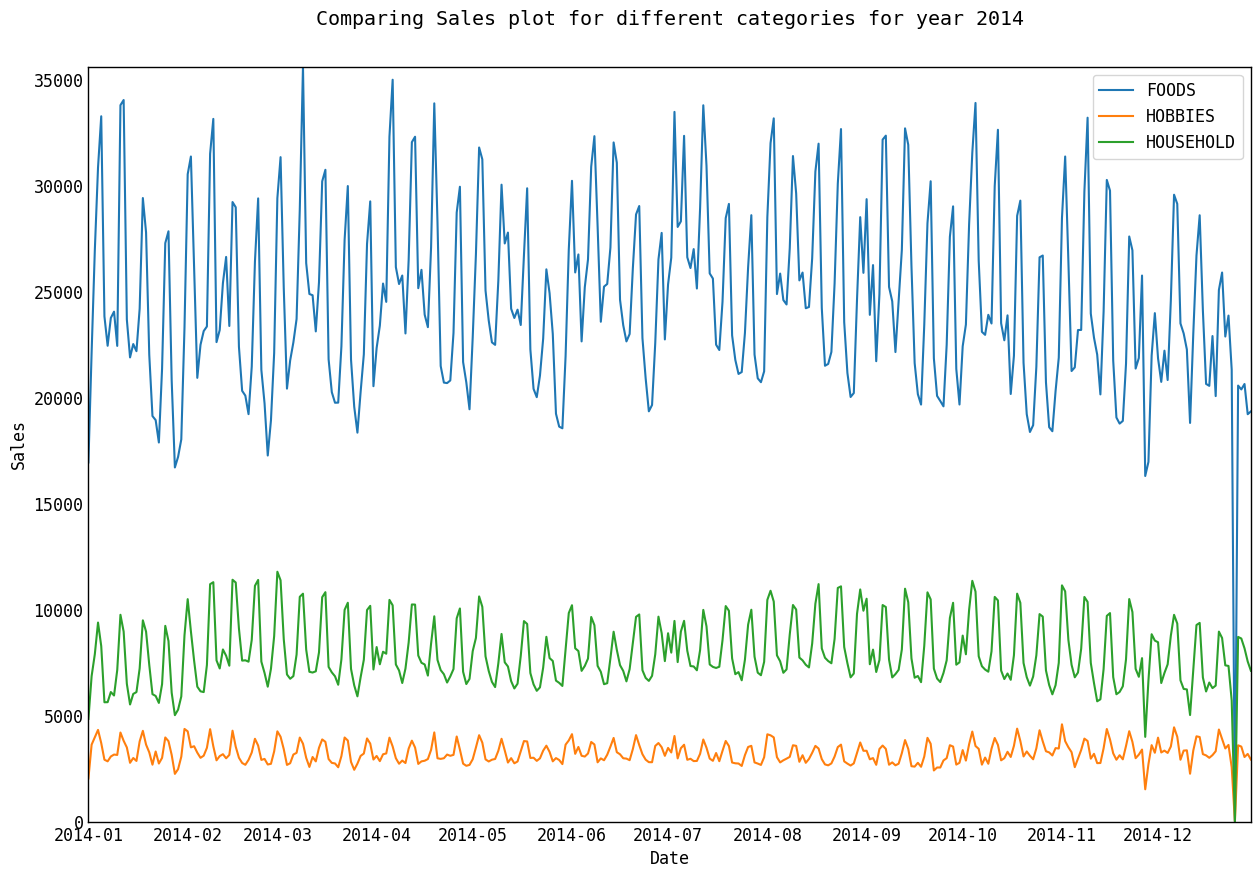

In [ ]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
for US_state in cat.index:   #going through all states
    plt.plot(pd.to_datetime(cat.columns)[1068:1432],cat.loc[US_state][1068:1432],label = US_state)
plt.title("Comparing Sales plot for different categories for year 2014")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Sales')

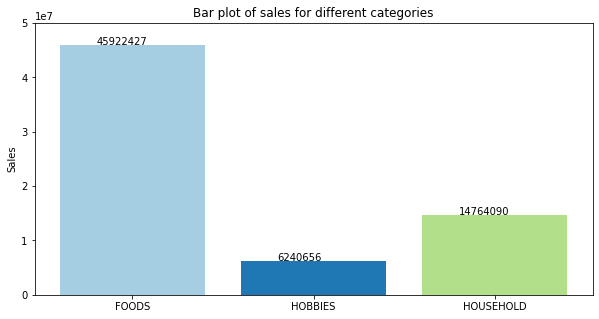

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylim(0,50000000)
plt.bar(cat.index,cat.sum(axis=1),color = plt.cm.Paired(np.arange(len(cat.index))))
for index,data in enumerate(cat.sum(axis=1)):  #https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    plt.text(x=index-0.20 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.title("Bar plot of sales for different categories")
plt.ylabel("Sales")

## DEPARTMENT

Text(0.5, 1.0, 'Distribution of department')

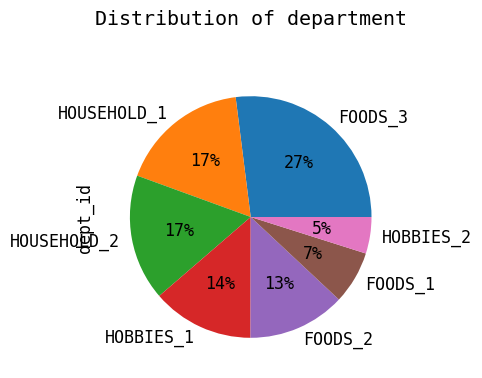

In [51]:
st['dept_id'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Distribution of department")

In [ ]:
dept = st.groupby(['dept_id']).sum()
dept

2011-01-29  2011-01-30  2011-01-31  2011-02-01  2011-02-02  \
dept_id                                                                   
FOODS_1            2343        2216        1657        1508        1209   
FOODS_2            4094        4209        3174        3606        2869   
FOODS_3           16741       16333       12343       13764       10525   
HOBBIES_1          3610        3172        2497        2531        1714   
HOBBIES_2           154         185         185         138         100   
HOUSEHOLD_1        4105        3858        2827        2732        1802   
HOUSEHOLD_2        1584        1776        1100        1133         927   

             2011-02-03  2011-02-04  2011-02-05  2011-02-06  2011-02-07  ...  \
dept_id                                                                  ...   
FOODS_1            1897        1903        2235        1925        1586  ...   
FOODS_2            4375        3349        4384        4273        3684  ...   
FOODS_3           15821       15238       21132       18664       13631  ...   
HOBBIES_1          3133        2855        3831        2741        2514  ...   
HOBBIES_2            87          89         155         158         101  ...   
HOUSEHOLD_1        2664        3161        4334        3494        2857  ...   
HOUSEHOLD_2        1234        1415        1861        1481        1199  ...   

             2016-05-13  2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
dept_id                                                                   
FOODS_1            4130        4257        4225        3264        3119   
FOODS_2            5842        7563        9069        6226        5311   
FOODS_3           20135       24756       28153       19668       17718   
HOBBIES_1          3422        4414        4464        3109        3142   
HOBBIES_2           449         479         552         419         487   
HOUSEHOLD_1        7936       10042       10572        7609        6999   
HOUSEHOLD_2        2159        2797        2886        2067        2001   

             2016-05-18  2016-05-19  2016-05-20  2016-05-21  2016-05-22  
dept_id                                                                  
FOODS_1            3073        3251        3735        4195        4031  
FOODS_2            4648        4551        4815        5940        6535  
FOODS_3           17069       16935       19586       23464       25401  
HOBBIES_1          3291        3027        3761        4832        4720  
HOBBIES_2           449         448         382         501         560  
HOUSEHOLD_1        6641        6759        7974        9668       10165  
HOUSEHOLD_2        1925        1992        2299        2918        2926  

[7 rows x 1941 columns]

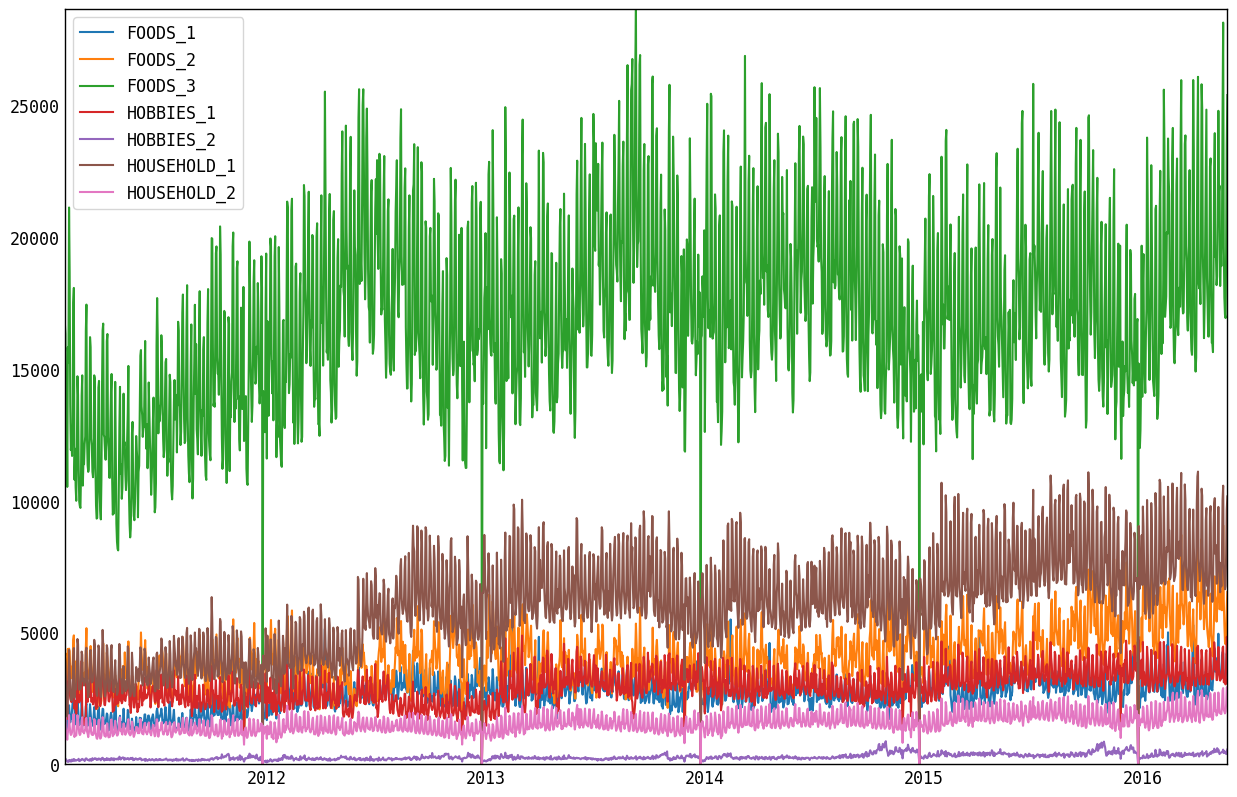

In [ ]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
for departments in dept.index:
    plt.plot(pd.to_datetime(dept.columns),dept.loc[departments],label = departments)
plt.title("Sales plot for different department")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

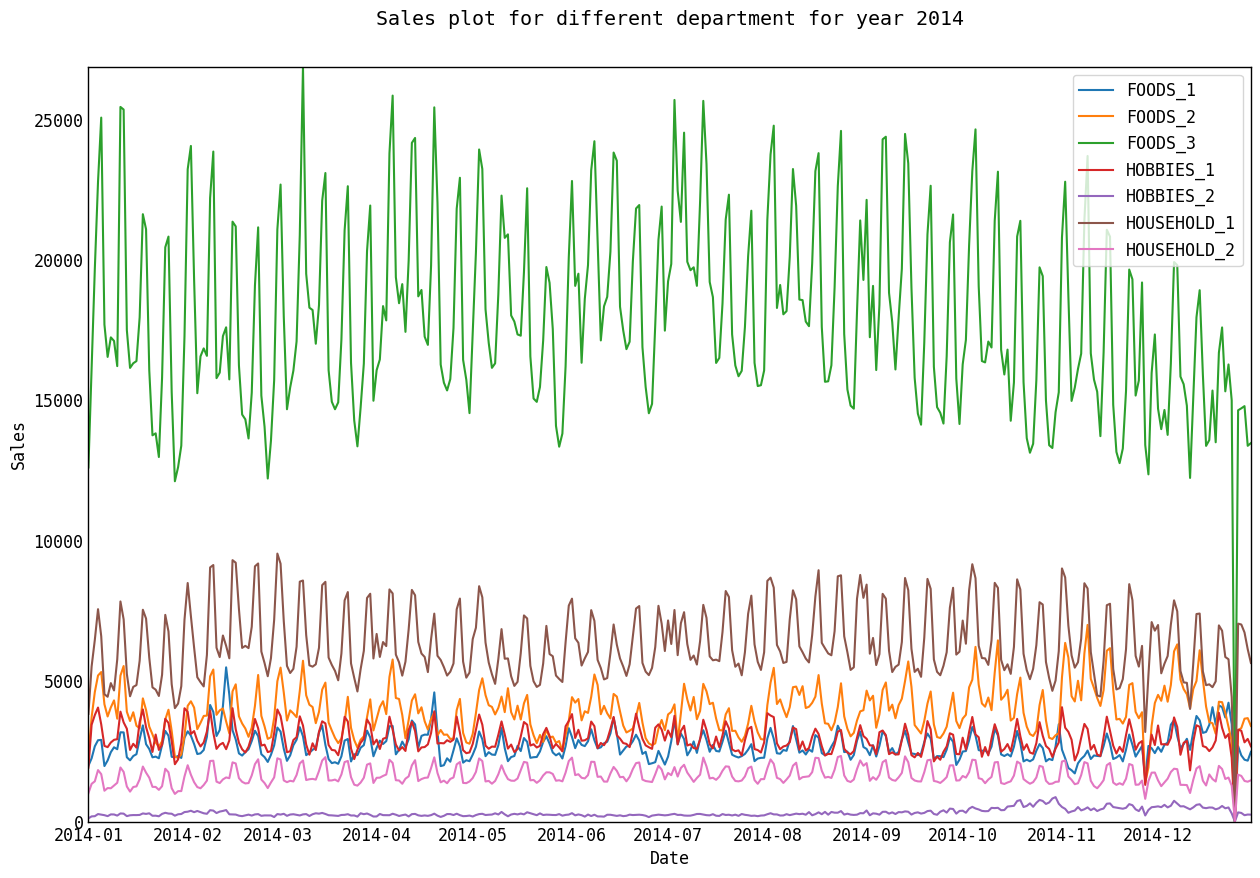

In [ ]:
plt.figure(figsize=(15, 10)) #https://www.geeksforgeeks.org/how-to-plot-timeseries-based-charts-using-pandas/
for departments in dept.index:
    plt.plot(pd.to_datetime(dept.columns)[1068:1432],dept.loc[departments][1068:1432],label = departments)
plt.title("Sales plot for different department for year 2014")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Sales')

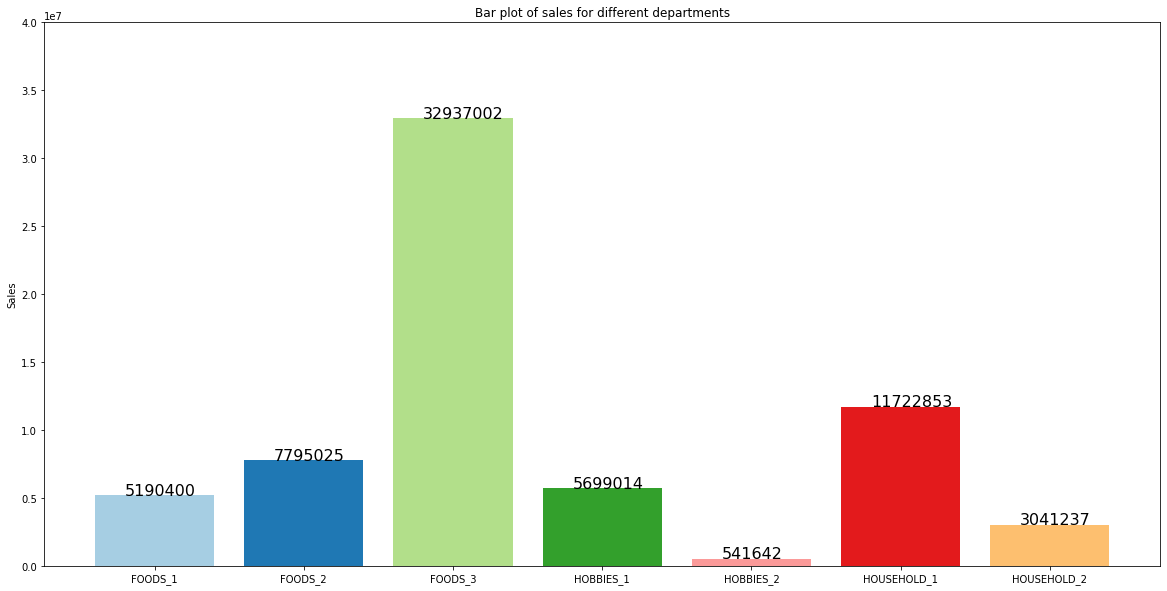

In [ ]:
plt.figure(figsize=(20, 10))
plt.ylim(0,40000000)
plt.bar(dept.index,dept.sum(axis=1),color = plt.cm.Paired(np.arange(len(dept.index))))
for index,data in enumerate(dept.sum(axis=1)):  #https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    plt.text(x=index-0.20 , y =data+1 , s=f"{data}",fontdict=dict(fontsize=16))
plt.title("Bar plot of sales for different departments")
plt.ylabel("Sales")

<p>There is not much overlap of data distribution between the department<br>
Food category have highest number of sales, especially FOODS_3</p>

In [ ]:
del dept
del store
del state
del cat
del total_sale_date  #to free up RAM

In [ ]:
sell = pd.read_csv('sell_prices.csv')
sell.head(-10)

store_id        item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1_001     11325        9.58
1           CA_1  HOBBIES_1_001     11326        9.58
2           CA_1  HOBBIES_1_001     11327        8.26
3           CA_1  HOBBIES_1_001     11328        8.26
4           CA_1  HOBBIES_1_001     11329        8.26
...          ...            ...       ...         ...
6841106     WI_3    FOODS_3_827     11607        1.00
6841107     WI_3    FOODS_3_827     11608        1.00
6841108     WI_3    FOODS_3_827     11609        1.00
6841109     WI_3    FOODS_3_827     11610        1.00
6841110     WI_3    FOODS_3_827     11611        1.00

[6841111 rows x 4 columns]

In [ ]:
sell['item_id'] = sell['item_id'].apply(lambda x: x[:-4])  #extracting department names
sell

store_id    item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1     11325        9.58
1           CA_1  HOBBIES_1     11326        9.58
2           CA_1  HOBBIES_1     11327        8.26
3           CA_1  HOBBIES_1     11328        8.26
4           CA_1  HOBBIES_1     11329        8.26
...          ...        ...       ...         ...
6841116     WI_3    FOODS_3     11617        1.00
6841117     WI_3    FOODS_3     11618        1.00
6841118     WI_3    FOODS_3     11619        1.00
6841119     WI_3    FOODS_3     11620        1.00
6841120     WI_3    FOODS_3     11621        1.00

[6841121 rows x 4 columns]

In [ ]:
group_price = sell.groupby(['item_id']).sum()
group_price.drop(columns=['wm_yr_wk'],inplace=True)
group_price

sell_price
item_id                
FOODS_1      1765663.66
FOODS_2      3362383.89
FOODS_3      5216033.58
HOBBIES_1    5978851.16
HOBBIES_2     869364.77
HOUSEHOLD_1  5868297.82
HOUSEHOLD_2  7115264.14

Text(0, 0.5, 'price')

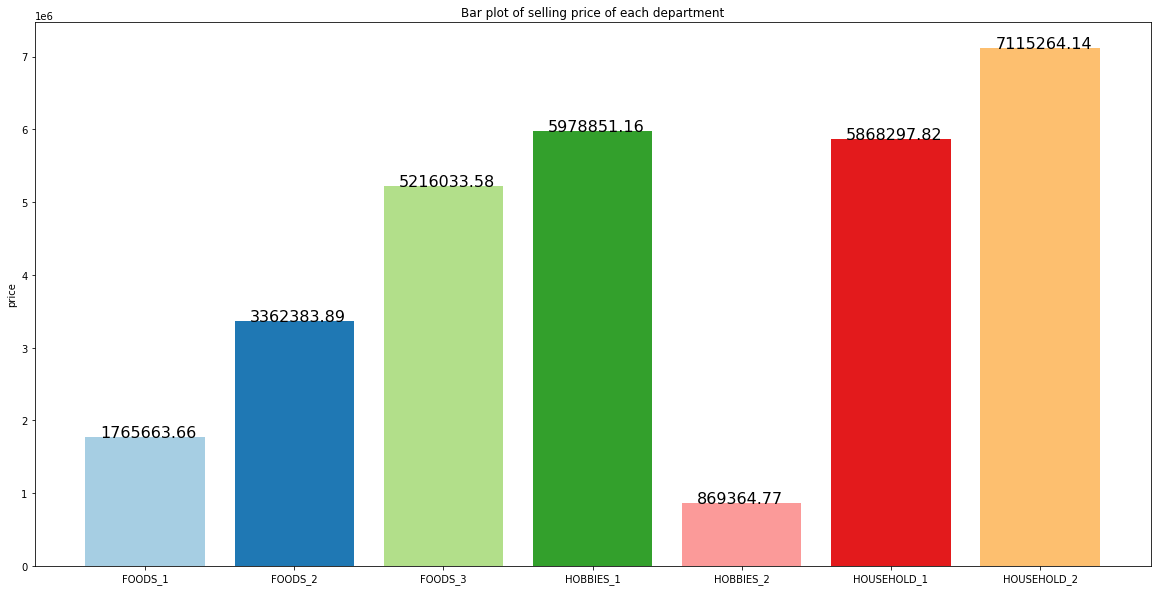

In [ ]:
plt.figure(figsize=(20, 10))
#plt.ylim(0,40000000)
plt.bar(group_price.index,group_price['sell_price'],color = plt.cm.Paired(np.arange(len(group_price.index))))
for index,data in enumerate(group_price['sell_price']):  #https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    plt.text(x=index-0.30 , y =data+1 , s=f"{data}",fontdict=dict(fontsize=16))
plt.title("Bar plot of selling price of each department")
plt.ylabel("price")

In [ ]:
group_mean_price = sell.groupby(['item_id']).mean()
group_mean_price.drop(columns=['wm_yr_wk'],inplace=True)
group_mean_price['sell_price'] = group_mean_price['sell_price'].apply(lambda x: round(x,3))
group_mean_price

sell_price
item_id                
FOODS_1           3.375
FOODS_2           4.084
FOODS_3           2.842
HOBBIES_1         6.226
HOBBIES_2         2.687
HOUSEHOLD_1       5.058
HOUSEHOLD_2       5.856

Text(0, 0.5, 'price')

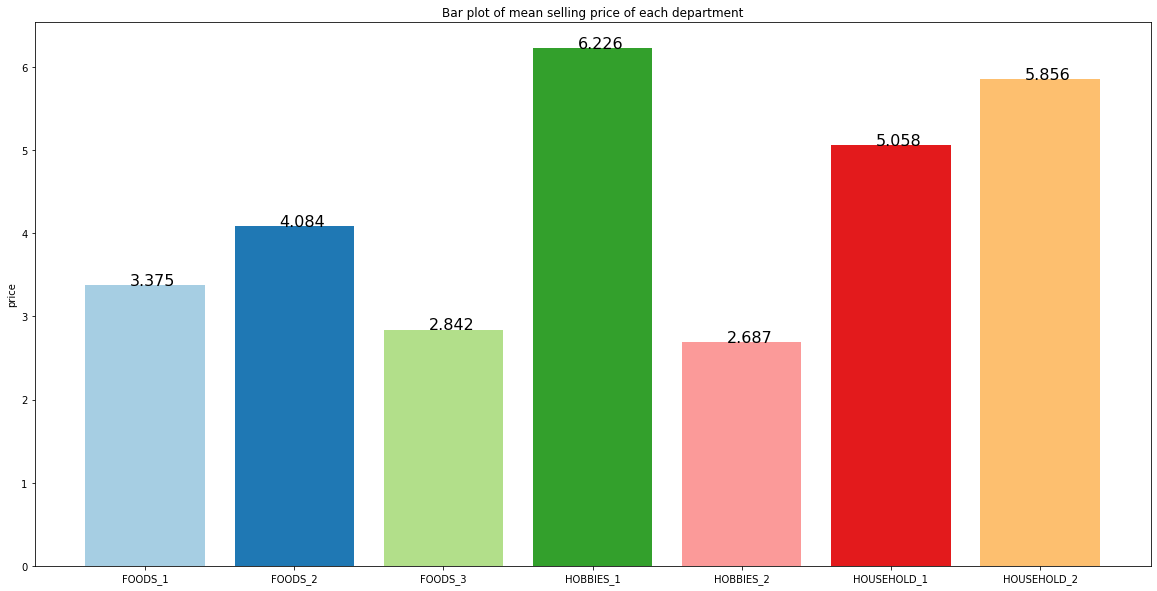

In [ ]:
plt.figure(figsize=(20, 10))
#plt.ylim(0,40000000)
plt.bar(group_mean_price.index,round(group_mean_price['sell_price'],3),color = plt.cm.Paired(np.arange(len(group_mean_price.index))))
for index,data in enumerate(group_mean_price['sell_price']):  #https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
    plt.text(x=index-0.10 , y =data , s=f"{data}",fontdict=dict(fontsize=16))
plt.title("Bar plot of mean selling price of each department")
plt.ylabel("price")

<p>HOBBIES_1 and HOUSEHOLD_2 have higher number of total price in all the years and also mean price as well </p>

In [ ]:
group_price_all = sell.groupby(['item_id'])
#group_price_all.drop(columns=['wm_yr_wk'],inplace=True)
group_price_all.get_group(('FOODS_1'))

store_id  item_id  wm_yr_wk  sell_price
368746      CA_1  FOODS_1     11101        2.00
368747      CA_1  FOODS_1     11102        2.00
368748      CA_1  FOODS_1     11103        2.00
368749      CA_1  FOODS_1     11104        2.00
368750      CA_1  FOODS_1     11105        2.00
...          ...      ...       ...         ...
6564805     WI_3  FOODS_1     11617        2.24
6564806     WI_3  FOODS_1     11618        2.24
6564807     WI_3  FOODS_1     11619        2.24
6564808     WI_3  FOODS_1     11620        2.24
6564809     WI_3  FOODS_1     11621        2.24

[523214 rows x 4 columns]

<Figure size 7200x3600 with 0 Axes>

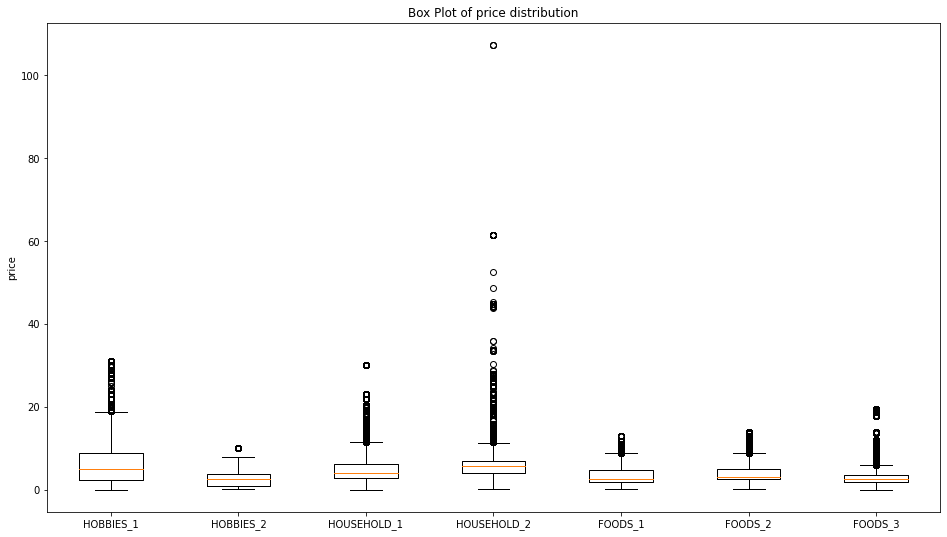

In [ ]:
color = plt.cm.Paired(np.arange(len(sell['item_id'].unique())))
count=0

my_dict = {}
for ele in sell['item_id'].unique():
    my_dict[ele] = group_price_all.get_group((ele))['sell_price'].tolist()
plt.figure(figsize=(100, 50))
plt.subplots(figsize=(16,9))
plt.boxplot(my_dict.values())
plt.xticks(range(1,len(my_dict.keys())+1),my_dict.keys())
plt.title("Box Plot of price distribution")
plt.ylabel("price")
plt.show()

<p> Price of HOBBIES_1 is more diversified and HOUSEHOLD_2 have outlier with higher selling price </p>

<h2>Important Observations from EDA </h2>

* Distribution of target column is tweedie distribution
* Lags : [1,7,14,21,28,35] are highly correlated with 0th data
* Saturday and Sunday have higher sales
* Sales also vary according to quarter
* There is slight increase in sales with year, so even year is good feature
* All cristmas day i.e. 25th of December have nearly zero sales

#### My First cut approach will be training Linear Models and then moving towards complex models like XGBoost and LightGBMregressor.
#### If RMSE score is low for above model then I will proceed with stacked Models on a complete Dataset.
#### If Both the above models fail, Then I will try to split dataset according to department and train different models for different department. This is because of the data distribution across different department

<h1> Feature Engineering </h1>
<b> (Merging of DataFrames) </b>

In [2]:
df = pd.read_csv('sales_train_evaluation.csv')
df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

In [3]:
for i in range(1942,1970):
    col_name = 'd_'+str(i)
    df[col_name] = 0
    df[col_name] = df[col_name].astype(np.int16) #total I have to predict 28 days for private score i.e. d_1941 to d_1969....so filling these spaces with zero.  
df

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1960  d_1961  d_1962  \
0         CA_1       CA    0    0    0    0  ...       0       0       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       0       0       0   
3         CA_1       CA    0    0    0    0  ...       0       0       0   
4         CA_1       CA    0    0    0    0  ...       0       0       0   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       0       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       0       0   
30488     WI_3       WI    0    0    0    0  ...       0       0       0   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1963  d_1964  d_1965  d_1966  d_1967  d_1968  d_1969  
0           0       0       0       0       0       0       0  
1           0       0       0       0       0       0       0  
2           0       0       0       0       0       0       0  
3           0       0       0       0       0       0       0  
4           0       0       0       0       0       0       0  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       0       0       0       0  
30486       0       0       0       0       0       0       0  
30487       0       0       0       0       0       0       0  
30488       0       0       0       0       0       0       0  
30489       0       0       0       0       0       0       0  

[30490 rows x 1975 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1975 entries, id to d_1969
dtypes: int16(28), int64(1941), object(6)
memory usage: 454.5+ MB


In [5]:
df.dtypes

id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1965       int16
d_1966       int16
d_1967       int16
d_1968       int16
d_1969       int16
Length: 1975, dtype: object

In [6]:
df.iloc[:, range(6,len(df.columns))].max().max() #checking max value. to decide between -> int16,int32,int64---for space optimization

763

In [7]:
np.iinfo(np.int16).max

32767

In [8]:
#reducing dtype from int64 to int16, this reduces the spce consumption
for ele in df.iloc[:, range(6,len(df.columns))].columns:
    df[ele] = df[ele].astype(np.int16)  #as maximum amount of sales in 763, so int16 (max of 32767) will be optimized dtype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1975 entries, id to d_1969
dtypes: int16(1969), object(6)
memory usage: 115.9+ MB


In [10]:
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df = pd.melt(df, 
             id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
             var_name='d', 
             value_name='sale').dropna() #melting down the data and dropping nan values
df.head(5)

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sale  
0       CA  d_1     0  
1       CA  d_1     0  
2       CA  d_1     0  
3       CA  d_1     0  
4       CA  d_1     0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60034810 entries, 0 to 60034809
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   id        object
 1   item_id   object
 2   dept_id   object
 3   cat_id    object
 4   store_id  object
 5   state_id  object
 6   d         object
 7   sale      int16 
dtypes: int16(1), object(7)
memory usage: 3.2+ GB


In [12]:
sell = pd.read_csv('sell_prices.csv')
sell.head(10)

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26
5     CA_1  HOBBIES_1_001     11330        8.26
6     CA_1  HOBBIES_1_001     11331        8.26
7     CA_1  HOBBIES_1_001     11332        8.26
8     CA_1  HOBBIES_1_001     11333        8.26
9     CA_1  HOBBIES_1_001     11334        8.26

In [13]:
sell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [14]:
sell['wm_yr_wk'] = sell['wm_yr_wk'].astype(np.int16)#Reduce space consumption
sell['sell_price'] = sell['sell_price'].astype(np.float32)#Reduce space consumption

In [15]:
sell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int16  
 3   sell_price  float32
dtypes: float32(1), int16(1), object(2)
memory usage: 143.5+ MB


In [16]:
cal = pd.read_csv('calendar.csv')
cal.fillna(0,inplace=True)
#Reduce space consumption
cal['wm_yr_wk'] = cal['wm_yr_wk'].astype(np.int16)
cal['year'] = cal['year'].astype(np.int16)
cal['snap_CA'] = cal['snap_CA'].astype(np.int16)
cal['snap_TX'] = cal['snap_TX'].astype(np.int16)
cal['snap_WI'] = cal['snap_WI'].astype(np.int16)

cal.drop(columns=['wday', 'month'],inplace = True)  #we will be extracting weeday/weekend and quarter from date column so don't need this columns

cal.head()

date  wm_yr_wk    weekday  year    d event_name_1 event_type_1  \
0  2011-01-29     11101   Saturday  2011  d_1            0            0   
1  2011-01-30     11101     Sunday  2011  d_2            0            0   
2  2011-01-31     11101     Monday  2011  d_3            0            0   
3  2011-02-01     11101    Tuesday  2011  d_4            0            0   
4  2011-02-02     11101  Wednesday  2011  d_5            0            0   

  event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0            0            0        0        0        0  
1            0            0        0        0        0  
2            0            0        0        0        0  
3            0            0        1        1        0  
4            0            0        1        0        1

In [17]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int16 
 2   weekday       1969 non-null   object
 3   year          1969 non-null   int16 
 4   d             1969 non-null   object
 5   event_name_1  1969 non-null   object
 6   event_type_1  1969 non-null   object
 7   event_name_2  1969 non-null   object
 8   event_type_2  1969 non-null   object
 9   snap_CA       1969 non-null   int16 
 10  snap_TX       1969 non-null   int16 
 11  snap_WI       1969 non-null   int16 
dtypes: int16(5), object(7)
memory usage: 127.0+ KB


In [18]:
#merging the df dataframe with calendar dataframe based on 'd' i.e. day
#merging evaluation dataframe and calender dataframe
#taking just 'd' because we just need day to match any events
df = pd.merge(df, cal, on='d', how='left')
del cal

In [19]:
df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sale        date  wm_yr_wk   weekday  year event_name_1  \
0       CA  d_1     0  2011-01-29     11101  Saturday  2011            0   
1       CA  d_1     0  2011-01-29     11101  Saturday  2011            0   
2       CA  d_1     0  2011-01-29     11101  Saturday  2011            0   
3       CA  d_1     0  2011-01-29     11101  Saturday  2011            0   
4       CA  d_1     0  2011-01-29     11101  Saturday  2011            0   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0            0            0            0        0        0        0  
1            0            0            0        0        0        0  
2            0            0            0        0        0        0  
3            0            0            0        0        0        0  
4            0            0            0        0        0        0

In [20]:
df['d'] = df['d'].apply(lambda x: int(x.split('_')[1])).astype(np.int16) #extracting just day number

In [21]:
df['year'].replace({2011:1,2012:2,2013:3,2014:4,2015:5,2016:6},inplace=True) #replacing year to categorical value
df['year'] = df['year'].astype(np.int16)

In [22]:
df['day'] = df['weekday'].apply(lambda x: 1 if x == 'Saturday' else ( 1 if x== 'Sunday' else 0)).astype(np.int8)

In [23]:
df['quarter'] = pd.to_datetime(df['date']).dt.quarter.astype(np.int8)
df.drop(columns = ['weekday','date'],inplace=True) #dropping weekday column

In [25]:
from sklearn.preprocessing import LabelEncoder
le = {}
for ele in ['event_name_1','event_name_2','event_type_1','event_type_2']:
        labelencoder=LabelEncoder()
        df[ele] = df[ele].astype(str)
        df[ele] = labelencoder.fit_transform(df[ele]).astype(np.int16)
        le[ele] = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

In [30]:
import pickle
with open('event_label.pickle','wb') as f:
    pickle.dump(le,f)

In [28]:
df['snap_CA'] = df['snap_CA'].astype(np.int8)
df['snap_TX'] = df['snap_TX'].astype(np.int8)
df['snap_WI'] = df['snap_WI'].astype(np.int8)
df['event_name_1'] = df['event_name_1'].astype(np.int8)
df['event_name_2'] = df['event_name_2'].astype(np.int8)
df['event_type_1'] = df['event_type_1'].astype(np.int8)
df['event_type_2'] = df['event_type_2'].astype(np.int8)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60034810 entries, 0 to 60034809
Data columns (total 19 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   id            object
 1   item_id       object
 2   dept_id       object
 3   cat_id        object
 4   store_id      object
 5   state_id      object
 6   d             int16 
 7   sale          int16 
 8   wm_yr_wk      int16 
 9   year          int16 
 10  event_name_1  int8  
 11  event_type_1  int8  
 12  event_name_2  int8  
 13  event_type_2  int8  
 14  snap_CA       int8  
 15  snap_TX       int8  
 16  snap_WI       int8  
 17  day           int8  
 18  quarter       int8  
dtypes: int16(4), int8(9), object(6)
memory usage: 4.1+ GB


In [31]:
df = pd.merge(df, sell, on=['store_id','item_id','wm_yr_wk'], how='left') #merging sell_price dataframe and combined evaluation and calendar dataframe

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60034810 entries, 0 to 60034809
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             int16  
 7   sale          int16  
 8   wm_yr_wk      int16  
 9   year          int16  
 10  event_name_1  int8   
 11  event_type_1  int8   
 12  event_name_2  int8   
 13  event_type_2  int8   
 14  snap_CA       int8   
 15  snap_TX       int8   
 16  snap_WI       int8   
 17  day           int8   
 18  quarter       int8   
 19  sell_price    float32
dtypes: float32(1), int16(4), int8(9), object(6)
memory usage: 4.3+ GB


In [33]:
print((1-((len(df['sell_price']) - df.isnull().sum().sum())/len(df['sell_price'])))*100 ,'% of items had zero sales in a day','\n','These NaN values will be filled with zeroes')

20.48713571343026 % of items had zero sales in a day 
 These NaN values will be filled with zeroes


In [34]:
df.fillna(0,inplace=True) #filling NaN in sell_price column with zero

In [35]:
df.to_csv('merged_df.csv',index=False) #saving final merged Dataframe

# Additional EDA of Events

In [51]:
d = {
  'd'           :  np.int16,  
  'sale'        :  np.int16,
  'wm_yr_wk'    : np.int16,  
  'year'        :  np.int16,  
  'event_name_1':  np.int8,   
  'event_type_1':  np.int8,   
  'event_name_2':  np.int8,   
  'event_type_2':  np.int8,   
  'snap_CA'    :  np.int8,   
  'snap_TX'    :   np.int8,   
  'snap_WI'    :   np.int8,   
  'day'        :   np.int8,   
  'quarter'    :   np.int8,   
   'sell_price':  np.float32
    
}

In [52]:
df = pd.read_csv('merged_df.csv',dtype=d)

In [53]:
df = df[['event_name_1','event_name_2','event_type_1','event_type_2','sale','d','snap_CA','snap_TX','snap_WI']]
df = df[df['d']<1942]  #because added d_1942-d_1969 with zero sales

In [54]:
le = pd.read_pickle('event_label.pickle')
en1 = dict([(value, key) for key, value in le['event_name_1'].items()])
en2 = dict([(value, key) for key, value in le['event_name_2'].items()])
et1 = dict([(value, key) for key, value in le['event_type_1'].items()])
et2 = dict([(value, key) for key, value in le['event_type_2'].items()])

In [55]:
df = df.replace({'event_name_1':en1})
df = df.replace({'event_name_2':en2})
df = df.replace({'event_type_1':et1})
df = df.replace({'event_type_2':et2})

In [56]:
df.groupby(['event_type_1'])['sale'].mean()

event_type_1
0            1.135105
Cultural     1.138688
National     0.966170
Religious    1.129099
Sporting     1.174026
Name: sale, dtype: float64

Text(0, 0.5, 'mean sale')

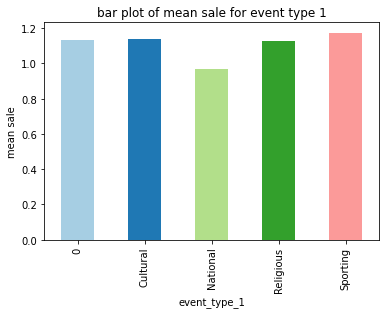

In [57]:
df.groupby(['event_type_1'])['sale'].mean().plot.bar(color = 
plt.cm.Paired(np.arange(len(df.groupby(['event_type_1'])['sale'].mean()))),title='bar plot of mean sale for event type 1')
plt.ylabel("mean sale")

Text(0, 0.5, 'mean sale')

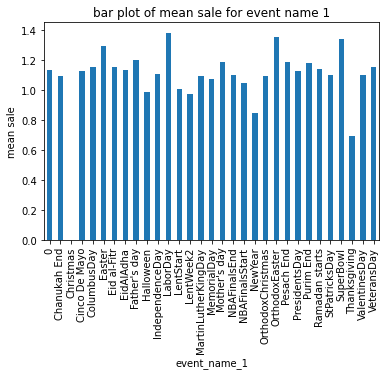

In [58]:
df.groupby(['event_name_1'])['sale'].mean().plot.bar(title='bar plot of mean sale for event name 1')
plt.ylabel("mean sale")

Text(0, 0.5, 'mean sale')

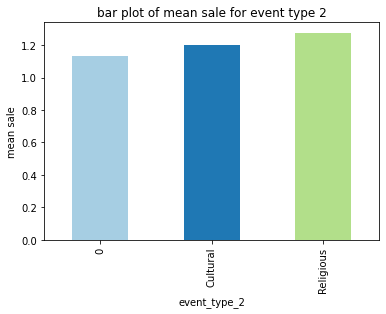

In [59]:
df.groupby(['event_type_2'])['sale'].mean().plot.bar(color = 
plt.cm.Paired(np.arange(len(df.groupby(['event_type_2'])['sale'].mean()))),title='bar plot of mean sale for event type 2')
plt.ylabel("mean sale")

Text(0, 0.5, 'mean sale')

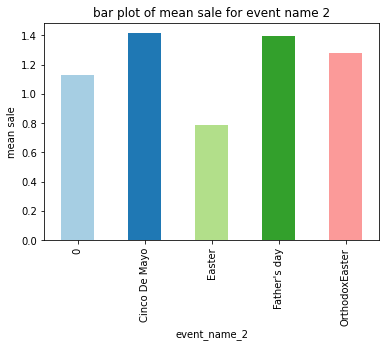

In [60]:
df.groupby(['event_name_2'])['sale'].mean().plot.bar(color = 
plt.cm.Paired(np.arange(len(df.groupby(['event_name_2'])['sale'].mean()))),title='bar plot of mean sale for event name 2')
plt.ylabel("mean sale")

Text(0, 0.5, 'mean sale')

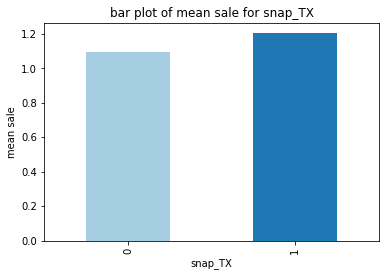

In [61]:
df.groupby(['snap_TX'])['sale'].mean().plot.bar(color = 
plt.cm.Paired(np.arange(len(df.groupby(['snap_TX'])['sale'].mean()))),title='bar plot of mean sale for snap_TX')
plt.ylabel("mean sale")

Text(0, 0.5, 'mean sale')

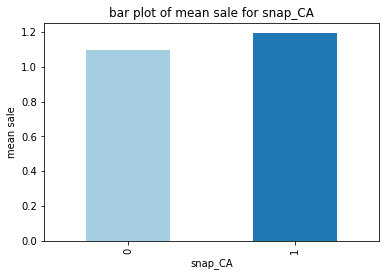

In [62]:
df.groupby(['snap_CA'])['sale'].mean().plot.bar(color = 
plt.cm.Paired(np.arange(len(df.groupby(['snap_CA'])['sale'].mean()))),title='bar plot of mean sale for snap_CA')
plt.ylabel("mean sale")

Text(0, 0.5, 'mean sale')

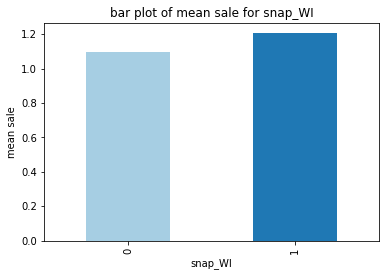

In [63]:
df.groupby(['snap_WI'])['sale'].mean().plot.bar(color = 
plt.cm.Paired(np.arange(len(df.groupby(['snap_WI'])['sale'].mean()))),title='bar plot of mean sale for snap_WI')
plt.ylabel("mean sale")